(4) The following is a plot of the multiplicity of an Einstein solid, which is a collection of $N$ harmonic oscillators, 
five in this case. It plots the log value of the multiplicity for a specific amount of total energy units $q$,
from 0 to 100.

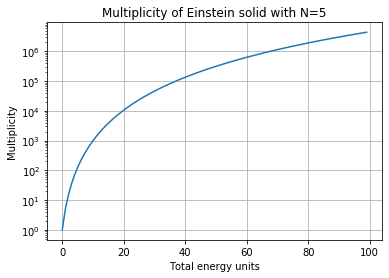

In [39]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import special as scisp

N = 5

def plot_multiplicity(N, q_range=100):
    q = np.arange(0, q_range, 1)
    
    multiplicity = scisp.comb(N+q-1,q)
    label_string = "N=" + str(N)
    plt.semilogy(q, multiplicity, label=label_string)

def multiplicity_plot_show(title, x_label, y_label="Multiplicity", grid=True, legend=False):
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    if grid:
        plt.grid()
    if legend:
        plt.legend()
    plt.show()

plot_multiplicity(N)
title = "Multiplicity of Einstein solid with N=" + str(N)
x_label = "Total energy units"
multiplicity_plot_show(title, x_label)

(5) The following is a plot similar to above, but now for multiple values of N, from 3 to 10.



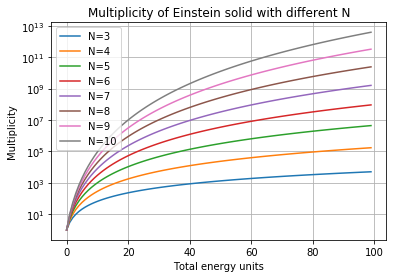

In [40]:
start_N = 3
end_N = 10
for N in range(start_N, end_N+1):
    plot_multiplicity(N)
title = "Multiplicity of Einstein solid with different N"
multiplicity_plot_show(title, x_label, legend=True)

(6) The following is a plot of the multiplicity of two solids, each with $N$=5 and interacting with
each other, so they share a total of 60 energy units. The multiplicities are calculated as a function
of the amount of energy units available to the first solid, denoted by $q_1$. 

For $q_1$=0, we have $q_2$=60, so all the energy units are part of System 2 and there is only 1 configuration
for system 1, namely that of having 0 units. As such, the total multiplicity, which is the product of the
multiplicities of the two systems, is equal to the multiplicity of System 2. For $q_1$=60, we instead
have $q_2$=0, so there is only one configuration for System 2 and many for System 1, so the multiplicity
of the total system is equal to the multiplicity of System 1.

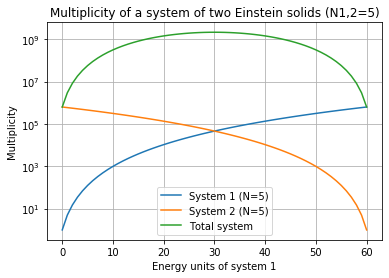

In [41]:
q_tot = 60
N1 = 5
N2 = 5

def plot_mutiplicity_2_solids(N1, N2, q_tot, calc_q_boundaries=False):
    if calc_q_boundaries:
        q1 = np.arange(0, q_tot+1, 1)
    else:
        q1 = np.arange(1, q_tot, 1)
    q2 = 60 - q1
    multiplicity1 = scisp.comb(N1+q1-1,q1)
    multiplicity2 = scisp.comb(N2+q2-1,q2)
    multiplicity_tot = multiplicity1*multiplicity2
    plt.semilogy(q1, multiplicity1, label="System 1 (N=" + str(N1) + ")")
    plt.semilogy(q1, multiplicity2, label="System 2 (N=" + str(N2) + ")")
    plt.semilogy(q1, multiplicity_tot, label="Total system")
    
    return multiplicity_tot, q1

plot_mutiplicity_2_solids(N1, N2, q_tot, calc_q_boundaries=True)
title = "Multiplicity of a system of two Einstein solids (N1,2=5)"
x_label = "Energy units of system 1"
multiplicity_plot_show(title, x_label, legend=True)

(7) The following includes a plot of two Einstein solids in thermal contact, with $N_1$ = 4 and $N_2$
= 8. 



18


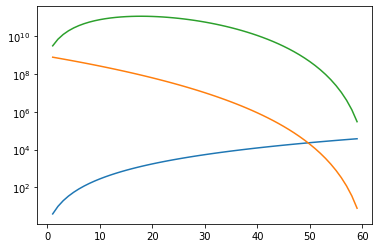

In [42]:
N1 = 4
N2 = 8

plot_mutiplicity_2_solids = plot_mutiplicity_2_solids(N1, N2, q_tot)
title = "Multiplicity of a system of two Einstein solids"
x_label = "Energy units of system 1"
multiplicity_tot = plot_mutiplicity_2_solids[0]
q1 = plot_mutiplicity_2_solids[1]
max_mult_i = np.argmax(multiplicity_tot)
max_q1 = q1[max_mult_i]
print(max_q1)